In [1]:
from tensorflow import keras
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

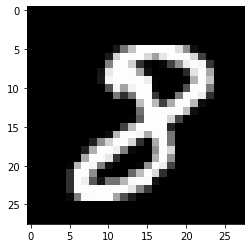

In [3]:
# check loaded dataset
import matplotlib.pyplot as plt
plt.imshow(x_train[1214],cmap = 'gray')
plt.show()

In [4]:
# Standardize the pixel values
x_train = x_train/255
x_test = x_test/255

In [5]:
# Create model
model = keras.Sequential()
model.add(keras.layers.Flatten()) # Input Layer
model.add(keras.layers.Dense(512,input_shape=x_train.shape[1:],activation = 'relu'))
model.add(keras.layers.Dense(10,activation ='softmax'))

In [6]:
# compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(x_train,y_train,epochs = 5)
# Batch-size = 32

Epoch 1/2
1875/1875 [==============================] - 12s 5ms/step - loss: 0.3489 - accuracy: 0.8954
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0852 - accuracy: 0.9751


In [8]:
y_pred = model.predict_classes(x_test)
y_pred

C:\Users\Administrator\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [9]:
import numpy as np
np.argmax(model.predict(x_test), axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [10]:
y_test # Real output

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
# Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test)

array([[ 973,    0,    1,    0,    1,    3,    3,    1,    4,    1],
       [   0, 1111,    0,    0,    0,    0,    3,    2,    0,    1],
       [   0,    4, 1012,    5,    3,    0,    0,    7,    3,    0],
       [   0,    1,    3,  984,    0,    7,    1,    2,   10,    2],
       [   1,    0,    3,    0,  934,    0,    9,    0,    5,    4],
       [   0,    2,    0,    3,    0,  869,    5,    0,    1,    3],
       [   1,    2,    2,    0,    3,    3,  933,    0,    0,    0],
       [   1,    1,    4,    4,    0,    1,    0,  993,    4,    0],
       [   2,    9,    6,    2,    0,    2,    4,    1,  932,    1],
       [   2,    5,    1,   12,   41,    7,    0,   22,   15,  997]],
      dtype=int64)

In [12]:
accuracy_score(y_pred,y_test)

0.9738

In [12]:
# We will store the NN Model in a file.
# .h5 file format 

model.save('model_digit.hdf5')

In [14]:
np.argmax(model.predict(x_test[0].reshape(1,28,28)))

7